In [18]:
import pandas as pd

df = pd.read_csv("heart_disease_uci.csv")

print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 920 entries, 0 to 919
Data columns (total 16 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   id        920 non-null    int64  
 1   age       920 non-null    int64  
 2   sex       920 non-null    object 
 3   dataset   920 non-null    object 
 4   cp        920 non-null    object 
 5   trestbps  861 non-null    float64
 6   chol      890 non-null    float64
 7   fbs       830 non-null    object 
 8   restecg   918 non-null    object 
 9   thalch    865 non-null    float64
 10  exang     865 non-null    object 
 11  oldpeak   858 non-null    float64
 12  slope     611 non-null    object 
 13  ca        309 non-null    float64
 14  thal      434 non-null    object 
 15  num       920 non-null    int64  
dtypes: float64(5), int64(3), object(8)
memory usage: 115.1+ KB
None


In [19]:
print(df.describe())

               id         age    trestbps        chol      thalch     oldpeak  \
count  920.000000  920.000000  861.000000  890.000000  865.000000  858.000000   
mean   460.500000   53.510870  132.132404  199.130337  137.545665    0.878788   
std    265.725422    9.424685   19.066070  110.780810   25.926276    1.091226   
min      1.000000   28.000000    0.000000    0.000000   60.000000   -2.600000   
25%    230.750000   47.000000  120.000000  175.000000  120.000000    0.000000   
50%    460.500000   54.000000  130.000000  223.000000  140.000000    0.500000   
75%    690.250000   60.000000  140.000000  268.000000  157.000000    1.500000   
max    920.000000   77.000000  200.000000  603.000000  202.000000    6.200000   

               ca         num  
count  309.000000  920.000000  
mean     0.676375    0.995652  
std      0.935653    1.142693  
min      0.000000    0.000000  
25%      0.000000    0.000000  
50%      0.000000    1.000000  
75%      1.000000    2.000000  
max      3.000

In [20]:
print(df.head())

   id  age     sex    dataset               cp  trestbps   chol    fbs  \
0   1   63    Male  Cleveland   typical angina     145.0  233.0   True   
1   2   67    Male  Cleveland     asymptomatic     160.0  286.0  False   
2   3   67    Male  Cleveland     asymptomatic     120.0  229.0  False   
3   4   37    Male  Cleveland      non-anginal     130.0  250.0  False   
4   5   41  Female  Cleveland  atypical angina     130.0  204.0  False   

          restecg  thalch  exang  oldpeak        slope   ca  \
0  lv hypertrophy   150.0  False      2.3  downsloping  0.0   
1  lv hypertrophy   108.0   True      1.5         flat  3.0   
2  lv hypertrophy   129.0   True      2.6         flat  2.0   
3          normal   187.0  False      3.5  downsloping  0.0   
4  lv hypertrophy   172.0  False      1.4    upsloping  0.0   

                thal  num  
0       fixed defect    0  
1             normal    2  
2  reversable defect    1  
3             normal    0  
4             normal    0  


In [21]:

missing = df.isnull().sum()
print("Missing Values:\n", missing)

df = df.dropna()


Missing Values:
 id            0
age           0
sex           0
dataset       0
cp            0
trestbps     59
chol         30
fbs          90
restecg       2
thalch       55
exang        55
oldpeak      62
slope       309
ca          611
thal        486
num           0
dtype: int64


In [22]:
missing = df.isnull().sum()
print("Missing Values:\n", missing)

Missing Values:
 id          0
age         0
sex         0
dataset     0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalch      0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
num         0
dtype: int64


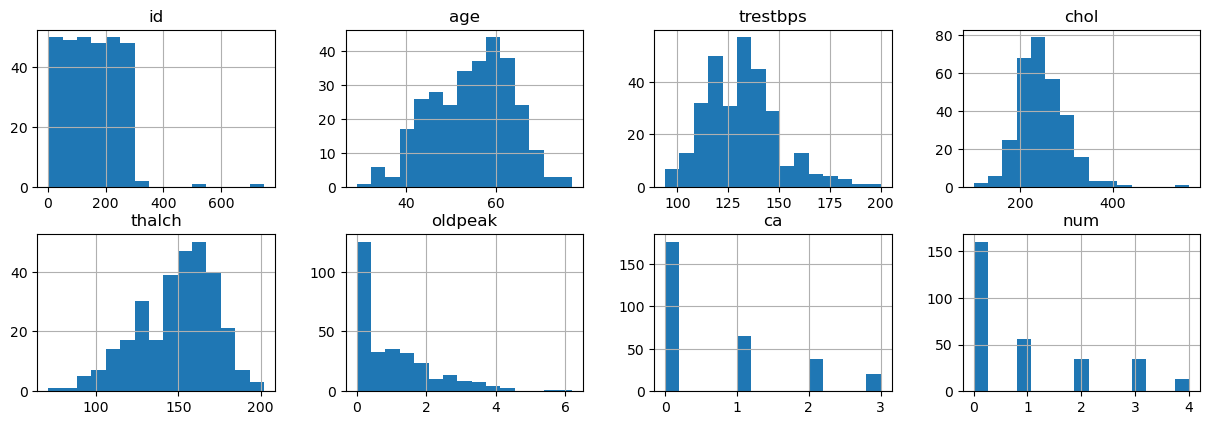

In [23]:
import seaborn as sns
import matplotlib.pyplot as plt

numerical_cols = df.select_dtypes(include=['float64', 'int64']).columns
df[numerical_cols].hist(bins=15, figsize=(15, 10), layout=(4, 4))
plt.show()


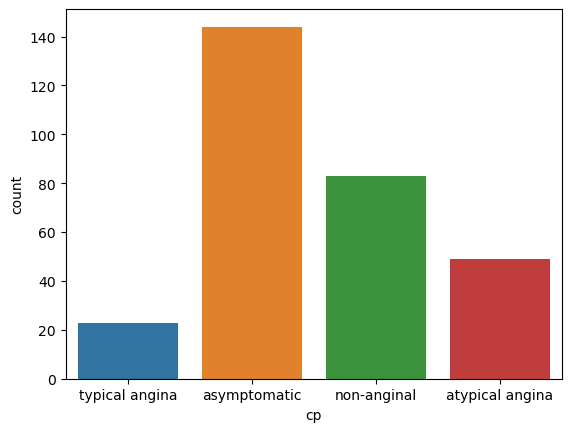

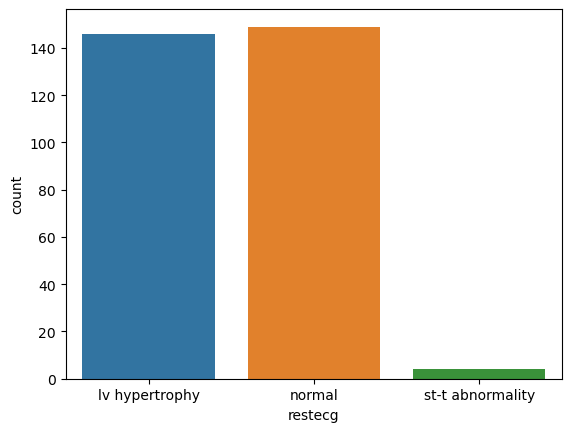

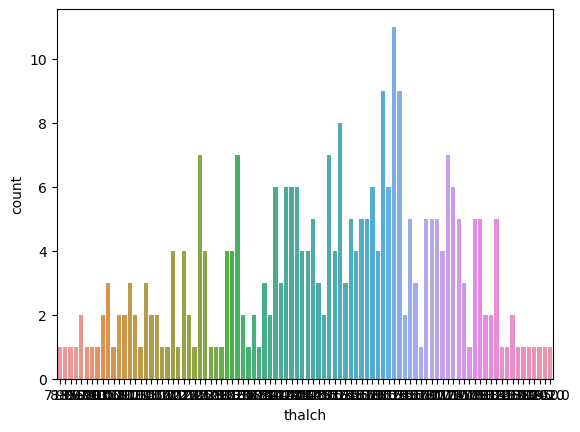

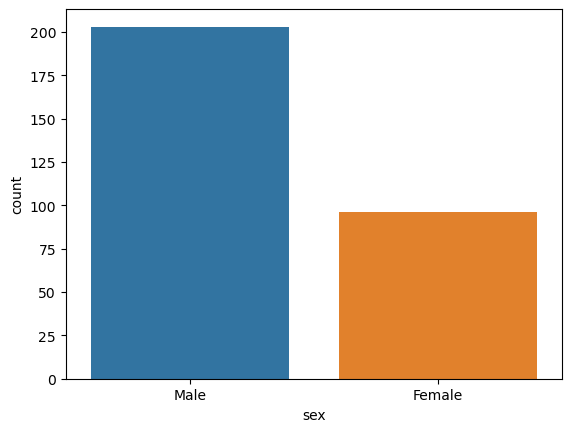

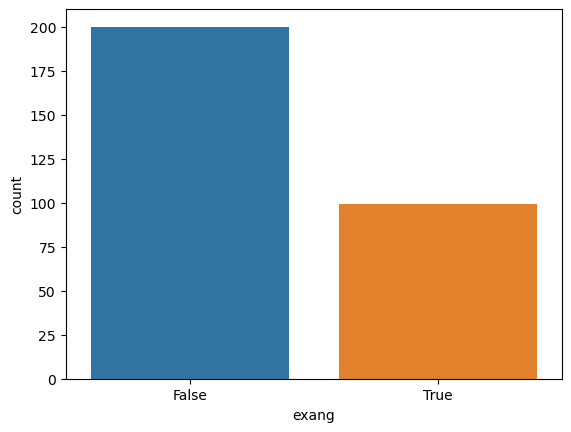

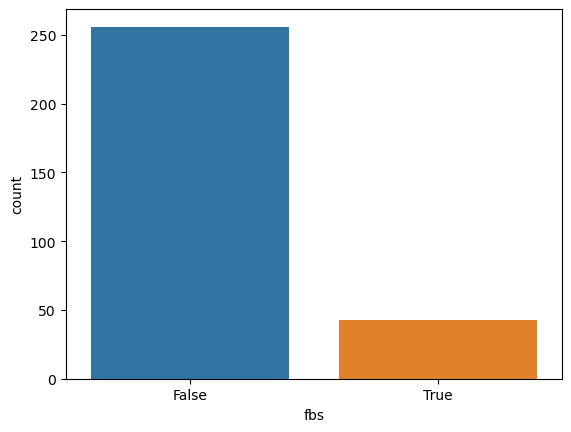

In [24]:

categorical_cols = ['cp', 'restecg', 'thalch', 'sex', 'exang', 'fbs']
for col in categorical_cols:
    sns.countplot(data=df, x=col)
    plt.show()


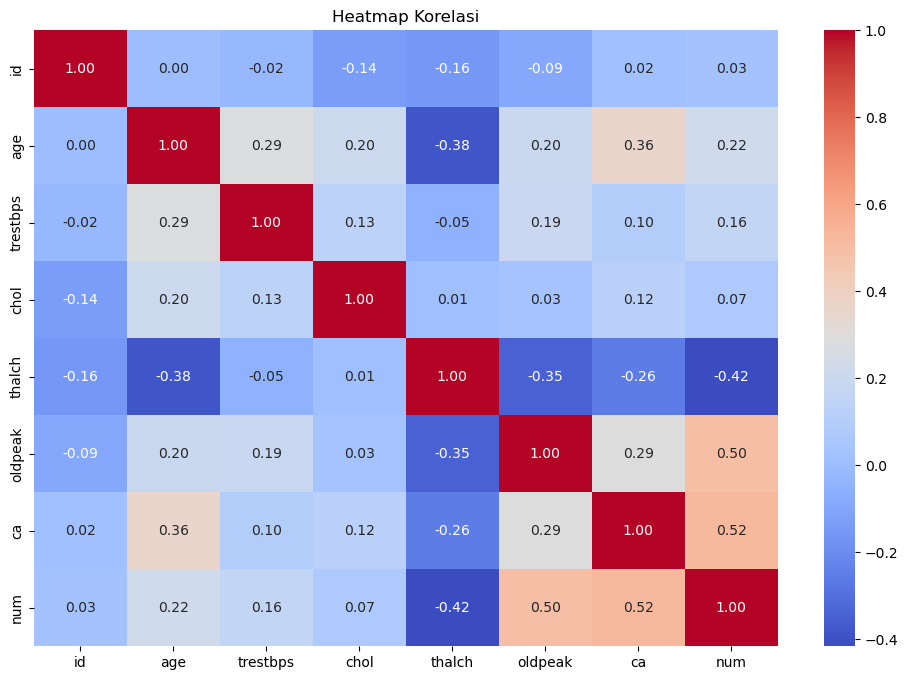

In [25]:

import numpy as np

df_numerical = df.select_dtypes(include=[np.number])  # Hanya memilih kolom numerik
correlation = df_numerical.corr()

plt.figure(figsize=(12, 8))
sns.heatmap(correlation, annot=True, fmt=".2f", cmap="coolwarm")
plt.title("Heatmap Korelasi")
plt.show()

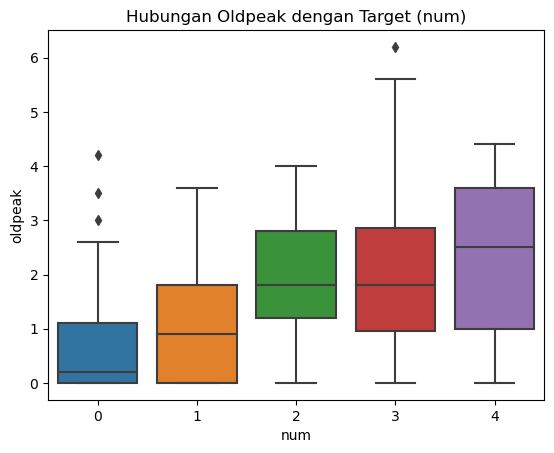

In [26]:

sns.boxplot(data=df, x="num", y="oldpeak")
plt.title("Hubungan Oldpeak dengan Target (num)")
plt.show()


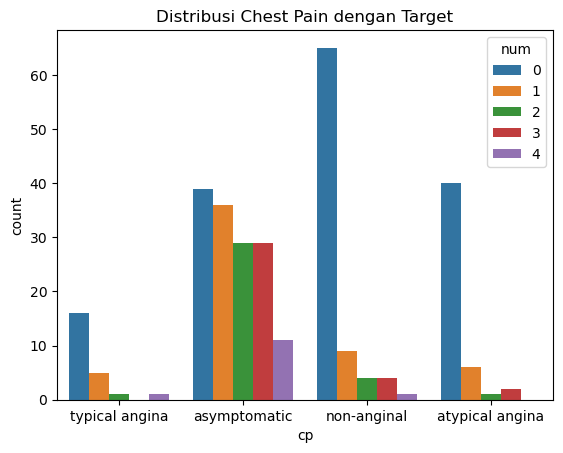

In [27]:

sns.countplot(data=df, x="cp", hue="num")
plt.title("Distribusi Chest Pain dengan Target")
plt.show()


In [28]:
import pandas as pd
from sklearn.feature_selection import SelectKBest, f_classif, chi2
from sklearn.impute import SimpleImputer

categorical_encoded = pd.get_dummies(df[categorical_cols])
X = pd.concat([df[numerical_cols], categorical_encoded], axis=1)
y = df["num"]

print("Apakah ada nilai negatif di X?")
print((X < 0).any()) 

X[X < 0] = 0

imputer = SimpleImputer(strategy="median") 
X = pd.DataFrame(imputer.fit_transform(X), columns=X.columns)

selector = SelectKBest(score_func=chi2, k=10)
X_new = selector.fit_transform(X, y)

print("Fitur terpilih:", X.columns[selector.get_support()])


Apakah ada nilai negatif di X?
id                          False
age                         False
trestbps                    False
chol                        False
thalch                      False
oldpeak                     False
ca                          False
num                         False
thalch                      False
cp_asymptomatic             False
cp_atypical angina          False
cp_non-anginal              False
cp_typical angina           False
restecg_lv hypertrophy      False
restecg_normal              False
restecg_st-t abnormality    False
sex_Female                  False
sex_Male                    False
exang_False                 False
exang_True                  False
fbs_False                   False
fbs_True                    False
dtype: bool
Fitur terpilih: Index(['id', 'age', 'chol', 'thalch', 'oldpeak', 'ca', 'num', 'thalch',
       'cp_asymptomatic', 'exang_True'],
      dtype='object')


In [29]:
selector = SelectKBest(score_func=f_classif, k=10)
X_new = selector.fit_transform(X, y)

print("Fitur terpilih:", X.columns[selector.get_support()])

Fitur terpilih: Index(['thalch', 'oldpeak', 'ca', 'num', 'thalch', 'cp_asymptomatic',
       'cp_non-anginal', 'sex_Male', 'exang_False', 'exang_True'],
      dtype='object')


c:\Users\HP\OneDrive\jiann\Lib\site-packages\sklearn\feature_selection\_univariate_selection.py:113: RuntimeWarning: divide by zero encountered in divide
  f = msb / msw


In [30]:
import numpy as np
import pandas as pd

# KNN 
class KNearestNeighbors:
    def __init__(self, k=5):
        self.k = k

    def fit(self, X, y):
        self.X_train = np.array(X)
        self.y_train = np.array(y)

    def predict(self, X):
        predictions = []
        for x in X:
            distances = np.sqrt(np.sum((self.X_train - x) ** 2, axis=1))
            k_indices = distances.argsort()[:self.k]
            k_labels = self.y_train[k_indices]
            predictions.append(np.bincount(k_labels).argmax())
        return np.array(predictions)

# Decision Tree
class DecisionTreeClassifier:
    def __init__(self, max_depth=10):
        self.max_depth = max_depth

    def fit(self, X, y):
        self.X_train = np.array(X)
        self.y_train = np.array(y)
        self.tree = self._build_tree(np.arange(len(y)), depth=0)

    def _build_tree(self, indices, depth):
        if len(set(self.y_train[indices])) == 1 or depth == self.max_depth:
            return np.bincount(self.y_train[indices]).argmax()

        best_feature, best_threshold = self._find_best_split(indices)
        left_indices = indices[self.X_train[indices, best_feature] < best_threshold]
        right_indices = indices[self.X_train[indices, best_feature] >= best_threshold]

        return {
            'feature': best_feature,
            'threshold': best_threshold,
            'left': self._build_tree(left_indices, depth + 1),
            'right': self._build_tree(right_indices, depth + 1)
        }

    def _find_best_split(self, indices):
        best_gini = float('inf')
        best_feature = None
        best_threshold = None

        for feature in range(self.X_train.shape[1]):
            thresholds = np.unique(self.X_train[indices, feature])
            for threshold in thresholds:
                left = self.y_train[indices[self.X_train[indices, feature] < threshold]]
                right = self.y_train[indices[self.X_train[indices, feature] >= threshold]]
                gini = self._gini_impurity(left, right)
                if gini < best_gini:
                    best_gini = gini
                    best_feature = feature
                    best_threshold = threshold

        return best_feature, best_threshold

    def _gini_impurity(self, left, right):
        def gini(labels):
            proportions = np.bincount(labels, minlength=2) / len(labels)
            return 1 - np.sum(proportions ** 2)

        n = len(left) + len(right)
        return len(left) / n * gini(left) + len(right) / n * gini(right)

    def _predict(self, node, x):
        if isinstance(node, dict):
            if x[node['feature']] < node['threshold']:
                return self._predict(node['left'], x)
            else:
                return self._predict(node['right'], x)
        else:
            return node

    def predict(self, X):
        return np.array([self._predict(self.tree, x) for x in X])

# Voting Classifier
class VotingClassifier:
    def __init__(self, models):
        self.models = models

    def fit(self, X, y):
        for model in self.models:
            model.fit(X, y)

    def predict(self, X):
        predictions = np.array([model.predict(X) for model in self.models])
        return np.apply_along_axis(lambda x: np.bincount(x).argmax(), axis=0, arr=predictions)

def load_data():
    data = pd.read_csv('heart_disease_data.csv')
    X = data.drop(columns=['num']).values 
    y = data['num'].astype(int).values 
    return X, y

def main():
    X, y = load_data()
    split_ratio = 0.9
    split_idx = int(len(X) * split_ratio)
    X_train, X_test = X[:split_idx], X[split_idx:]
    y_train, y_test = y[:split_idx], y[split_idx:]

    knn = KNearestNeighbors(k=11)
    dt = DecisionTreeClassifier(max_depth=10)
    voting = VotingClassifier(models=[knn, dt])

    voting.fit(X_train, y_train)

    def predict_heart_disease(input_data):
        expected_features = ['age', 'trestbps', 'chol', 'oldpeak', 'ca','thalch',
            'cp_asymptomatic', 'cp_atypical angina', 'cp_non-anginal',
            'cp_typical angina', 'restecg_lv hypertrophy', 'restecg_normal',
            'restecg_st-t abnormality', 'sex_Female', 'sex_Male', 'exang_False',
            'exang_True', 'fbs_False', 'fbs_True']

        if len(input_data) < len(expected_features):
            input_data += [0] * (len(expected_features) - len(input_data))
        
        input_array = np.array(input_data).reshape(1, -1)
        return voting.predict(input_array)[0]

    sample_input = [32, 140, 32, 23.0, 2, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1]
    print(len(sample_input))
    prediction = predict_heart_disease(sample_input)
    print("Prediction:", f"Heart Disease {prediction}" if prediction >= 1 else "No Heart Disease")

if __name__ == "__main__":
    main()

C:\Users\HP\AppData\Local\Temp\ipykernel_28716\2420378384.py:67: RuntimeWarning: invalid value encountered in divide
  proportions = np.bincount(labels, minlength=2) / len(labels)


19
Prediction: No Heart Disease
